<a href="https://colab.research.google.com/github/662004/Mobile--range-price-prediction/blob/main/Mobile_range_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install opendatasets

In [8]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction?select=Cellphone.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jatin2004
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction


100%|██████████| 19.3k/19.3k [00:00<00:00, 28.4MB/s]

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
data = pd.read_csv("/content/mobile-price-prediction/Cellphone.csv")

In [21]:
df = pd.read_csv("/content/mobile-price-prediction/Cellphone.csv")


In [30]:
data.head()
print(df.columns)


Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness', 'price_range'],
      dtype='object')


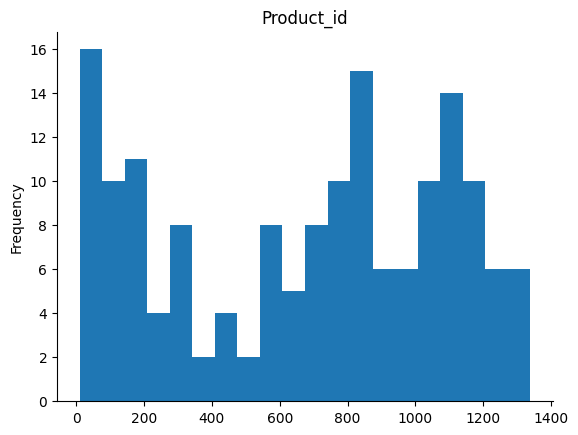

In [15]:
# @title Product_id

from matplotlib import pyplot as plt
data['Product_id'].plot(kind='hist', bins=20, title='Product_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [31]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [33]:
print(df.info())
print(df.isnull().sum())
df.dropna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    161 non-null    int64  
 1   price         161 non-null    int64  
 2   sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu_core      161 non-null    int64  
 7   cpu_freq      161 non-null    float64
 8   internal_mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  rearcam       161 non-null    float64
 11  front_cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
 14  price_range   161 non-null    int8   
dtypes: float64(8), int64(6), int8(1)
memory usage: 17.9 KB
None
product_id      0
price           0
sale            0
weight          0
resoloution     0
ppi      

<bound method DataFrame.dropna of      product_id  price  sale  weight  resoloution  ppi  cpu_core  cpu_freq  \
0           203   2357    10   135.0         5.20  424         8     1.350   
1           880   1749    10   125.0         4.00  233         2     1.300   
2            40   1916    10   110.0         4.70  312         4     1.200   
3            99   1315    11   118.5         4.00  233         2     1.300   
4           880   1749    11   125.0         4.00  233         2     1.300   
..          ...    ...   ...     ...          ...  ...       ...       ...   
156        1206   3551  4638   178.0         5.46  538         4     1.875   
157        1296   3211  8016   170.0         5.50  534         4     1.975   
158         856   3260  8809   150.0         5.50  401         8     2.200   
159        1296   3211  8946   170.0         5.50  534         4     1.975   
160        1131   2536  9807   202.0         6.00  367         8     1.500   

     internal_mem    ram  rearcam  front_cam  battery  thickness  price_range  
0            16.0  3.000    13.00        8.0     2610        7.4            0  
1             4.0  1.000     3.15        0.0     1700        9.9            0  
2             8.0  1.500    13.00        5.0     2000        7.6            0  
3             4.0  0.512     3.15        0.0     1400       11.0            0  
4             4.0  1.000     3.15        0.0     1700        9.9            0  
..            ...    ...      ...        ...      ...        ...          ...  
156         128.0  6.000    12.00       16.0     4080        8.4            0  
157         128.0  6.000    20.00        8.0     3400        7.9            0  
158          64.0  4.000    20.00       20.0     3000        6.8            0  
159         128.0  6.000    20.00        8.0     3400        7.9            0  
160          16.0  3.000    21.50       16.0     2700        8.4            0  

[161 rows x 15 columns]>

In [35]:
max_price = df['price'].max()

# Make sure the last bin is greater than the one before it
if max_price <= 20000:
    bins = [0, 5000, 10000, 15000, 20000, 21000]
else:
    bins = [0, 5000, 10000, 15000, 20000, max_price + 1000]

labels = ['Very Low', 'Low', 'Mid', 'High', 'Very High']

df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)



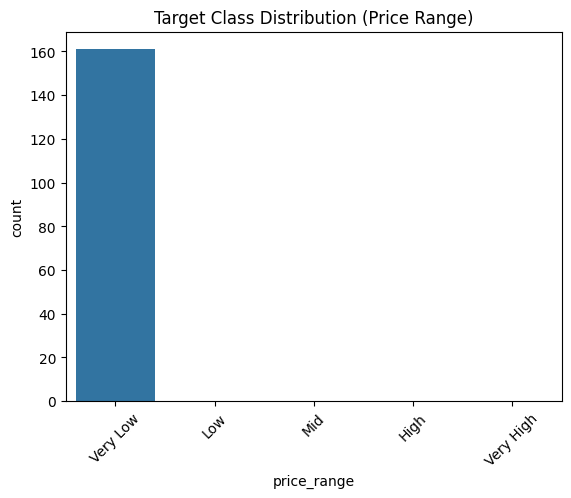

In [36]:
sns.countplot(x='price_range', data=df)
plt.title('Target Class Distribution (Price Range)')
plt.xticks(rotation=45)
plt.show()


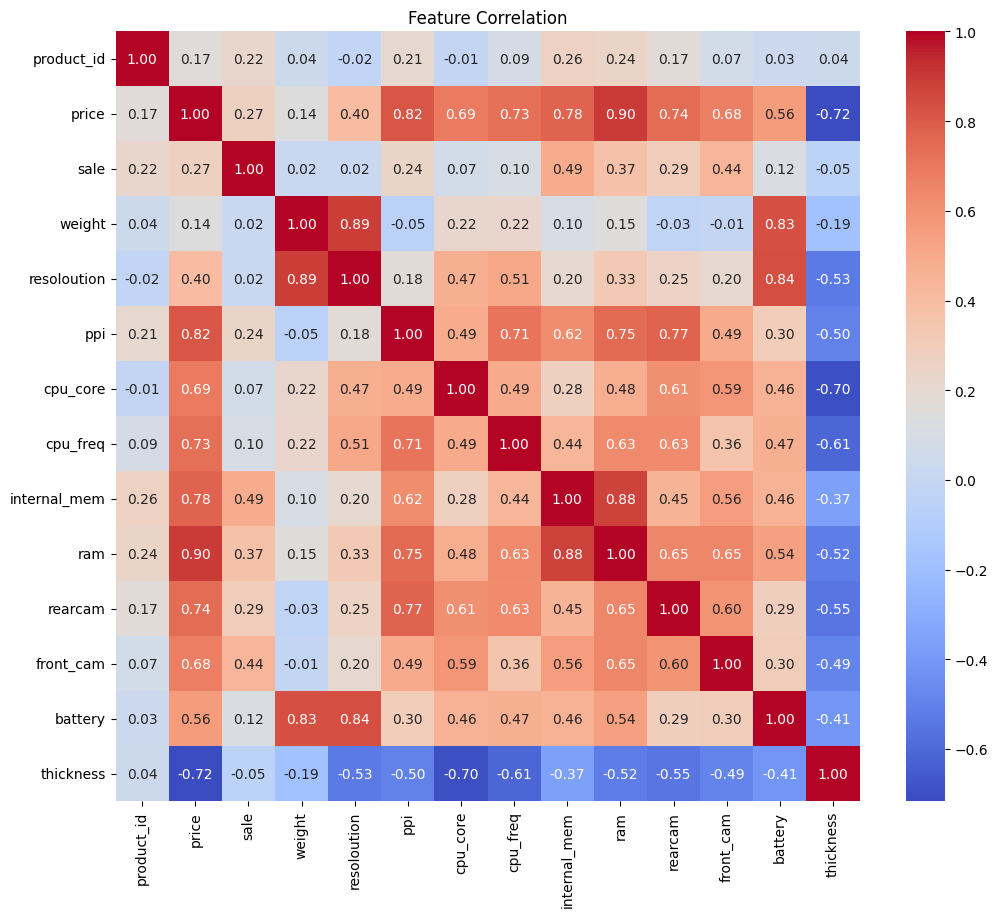

In [37]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [38]:
# Drop unused column

df = df.drop(['product_id', 'price_range'], axis=1)


In [51]:
# split into features and target
X = df.drop('price', axis=1)
y = df['price']


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train -test split

In [54]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# train  random forest model

RandomForestRegressor(random_state=42)

In [45]:
y_pred = model.predict(X_test)

# Metrics
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.9697054813303743
MSE: 17173.63031212121
RMSE: 131.04819843142144


In [56]:
sample = X_test.iloc[[0]]  # double brackets keep it as DataFrame
predicted_price = model.predict(sample)
print("Predicted Price:", predicted_price[0])


Predicted Price: 822.86
